In [34]:
import cv2
# import pytesseract
import pandas as pd
import numpy as np
import segyio
from segyio import TraceField ,BinField
import matplotlib.pyplot as plt
# from segpy.dataset import Dataset
import logging
from pathlib import Path

import toml
from PIL import Image, ImageOps
# from segpy.writer import write_segy

# from img2segy.geometry import Geometry
# from matrix_dataset import ImageDataset
# from img2segy.trace_header_mapper import TraceHeaderMapper

logger = logging.getLogger(__name__)

# my=np.append(y[fromsample:],np.zeros(fromsample))
# len(trc),len(my)
import numpy as np
from scipy.signal import butter, lfilter, freqz
import matplotlib.pyplot as plt
%matplotlib inline

def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y


def convert(image_filepath: Path, segy_filepath: Path=None, config_filepath: Path=None, *, force=False):
    image_filepath = Path(image_filepath)
    segy_filepath = (segy_filepath and Path(segy_filepath)) or image_filepath.with_suffix(".segy")
    config_filepath = (config_filepath and Path(config_filepath)) or image_filepath.with_suffix(".toml")

    logger.info("segy_filepath = %s", segy_filepath)
    logger.info("image_filepath = %s", image_filepath)
    logger.info("config_filepath = %s", config_filepath)
#     print(segy_filepath)
    return image_filepath,segy_filepath,config_filepath

# pytesseract.pytesseract.tesseract_cmd ='C:\Program Files (x86)\Tesseract-OCR/tesseract.exe'

folder=r'C:\Users\ArunBabu\OneDrive - ANTELOPUS ENERGY PRIVATE LIMITED\Python\Digitization\Image2segy\\'
file='Seismic_data_to_be_digitized_bad_quality.png'
# file='Seismic_data_to_be_digitized_good_quality.png'
path=folder+file

image = cv2.imread(folder+file)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

In [24]:
thresh.mean()

77.61243525392484

In [35]:
# # Remove horizontal lines
# horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (50,1))
# detect_horizontal = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, horizontal_kernel, iterations=2)

# # cv2.drawContours(thresh, [c], -1, (0,0,0),ct_horizontal = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, horizontal_kernel, iterations=2)
# cnts = cv2.findContours(detect_horizontal, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# cnts = cnts[0] if len(cnts) == 2 else cnts[1]
# for c in cnts:
#     cv2.drawContours(thresh, [c], -1, (0,0,0), 3)

# # Remove vertical lines
# vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,15))
# detect_vertical = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, vertical_kernel, iterations=2)
# cnts = cv2.findContours(detect_vertical, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# cnts = cnts[0] if len(cnts) == 2 else cnts[1]
# for c in cnts:
#     cv2.drawContours(thresh, [c], -1, (0,0,0), 3)

# # cv2.imshow('thresh', thresh)
# cv2.imshow('thresh', gray)
# # cv2.imshow('result', result)
# # cv2.imshow('dilate', dilate)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

import numpy as np
from scipy import signal

#  For bad quality
strc=101
etrc=305
stime=0
etime=4900


# #  For good quality
# stime=-200
# etime=3100
# strc=2000
# etrc=2180


ntrc=(etrc-strc)*2.0


trange=np.arange(stime,etime+1,2).astype(int)
pixper_trc=thresh.shape[1]/ntrc

ntrc,thresh.shape,pixper_trc*ntrc,
pixrange=np.arange(0,thresh.shape[1]+1,pixper_trc).astype(int)
# pixrange
ntrc,trange

tmean=thresh.mean()
tmean=100
# 
thresh[thresh<tmean]=0
thresh[thresh>tmean]=1
# plt.hist(thresh)

traces=[]
for i in range(len(pixrange)-1):
#     print(pixrange[i],pixrange[i+1])
    trc=thresh[:,pixrange[i]:pixrange[i+1]].sum(axis=1)
    traces.append(trc)
pd.DataFrame(np.array(traces).T)

,0,1,2,3,4,5,6,7,8,9,...,398,399,400,401,402,403,404,405,406,407
0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,2,0,1,0,0,0
1,0,1,1,2,1,0,0,1,0,2,...,0,0,1,2,0,0,1,0,0,0
2,0,0,0,2,0,0,0,0,0,2,...,0,0,0,1,0,0,1,0,0,0
3,0,0,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
577,0,0,0,0,0,1,0,1,0,0,...,1,1,1,1,2,1,2,0,0,0
578,0,0,0,1,0,1,0,1,1,1,...,1,1,2,1,2,1,2,0,0,0
579,0,0,0,0,0,0,0,1,0,0,...,1,1,1,1,1,0,1,0,0,0
580,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0


In [26]:
pixrange
thresh.shape,pixper_trc

((582, 1029), 2.5220588235294117)

7

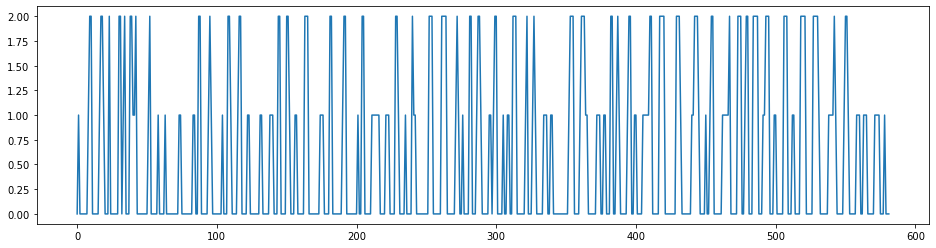

In [36]:
# plt.imshow( np.array(traces).T[:40,:20])
plt.figure(figsize=(16,4))
plt.plot(traces[10])
mtrc=traces[10].copy()
mtrc[mtrc>0]=10
dtrc=np.diff(mtrc.astype(float))
dtrc[dtrc>0]=1
dtrc[dtrc<0]=0
round(len(dtrc)/dtrc.sum())

In [37]:
mtrc=traces[10]
counts={}
for i in np.unique(mtrc):
    counts[i]=[]
counts

count=0
for i in range(1,len(mtrc)):
#     st=mtrc[i-1]
    if mtrc[i-1]==mtrc[i]:
        count+=1
    else:
        counts[mtrc[i-1]].append(count)
        count=0
countmeans={}
for k in counts  :
#     print(k,': ',np.mean(counts[k]))
    countmeans[k]=np.mean(counts[k])
countmeans

{0: 3.4430379746835444, 1: 0.6944444444444444, 2: 1.163265306122449}

In [38]:
mkeys=np.array(list(countmeans.keys()))
# mkeys=np.array([0,1,2])
nkeys=len(mkeys)
# if nkeys%2==1:
opvalues=mkeys+0.5-nkeys/2
nopdigits=[]
for k in countmeans:
    val=np.round(countmeans[k])
#     val= 1 if val==0 else val
    nopdigits.append(val)
nopdigits
op=[]
for i in range(len(nopdigits)):
    op.extend([opvalues[i]]*int(nopdigits[i]))
nopdigits=nopdigits[::-1][1:]
opvalues=opvalues[::-1][1:]
for i in range(len(nopdigits)):
    op.extend([opvalues[i]]*int(nopdigits[i]))
op

[-1.0, -1.0, -1.0, 0.0, 1.0, 0.0, -1.0, -1.0, -1.0]

In [39]:
op=np.array(op)
op-=np.mean(op)
op

array([-0.44444444, -0.44444444, -0.44444444,  0.55555556,  1.55555556,
        0.55555556, -0.44444444, -0.44444444, -0.44444444])

In [40]:
time_in_msec=etime-stime

pixels_4_entire_time=thresh.shape[0]

pixels4msec=pixels_4_entire_time/time_in_msec
time_in_msec,pixels_4_entire_time,pixels4msec,len(traces[0])

(4900, 582, 0.11877551020408163, 582)

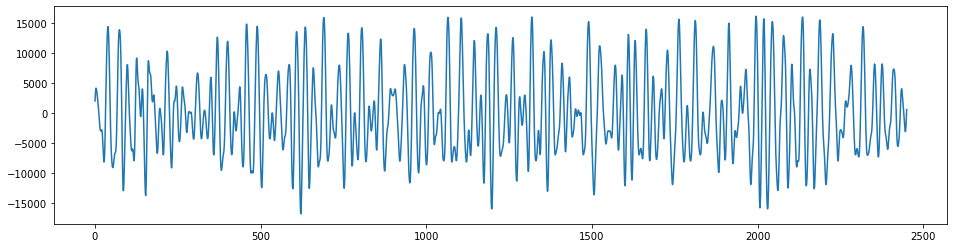

([<matplotlib.lines.Line2D at 0x1bad5f57250>], 2451, 2451)

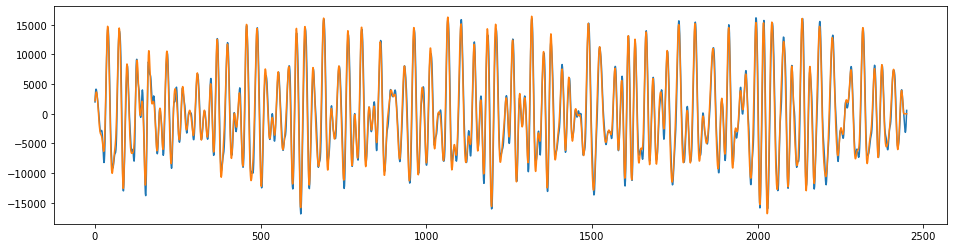

In [41]:
traces=(np.array(traces)*1000).astype(np.float64)
op=[-3,-1,2,4,2,-1,-3]

# op=[-5,-3,-1,2,3.5,7,3.5,2,-1,-3,-5]
# np.conv(traces[10],op)
proctrcs=[]
for trc in traces:
    res=np.convolve(trc,op)[3:len(trc)+3]
    f = signal.resample(res, len(trange))
    proctrcs.append(f)
plt.figure(figsize=(16,4))
plt.plot(proctrcs[10]),len(proctrcs[10]),len(proctrcs[10])
plt.show()
# res[:10],traces[10][:10]

# proctrcs=np.array(proctrcs).T
# proctrcs.shape

# plt.figure(figsize=(16,4))
# plt.plot(f),len(f),len(res)



filttrcs=[]
order = 6
fs = 500.0       # sample rate, Hz
cutoff = 35.0  # desired cutoff frequency of the filter, Hz
freq=cutoff
smpls2shift=round(900*pow(freq,-1.274))
fromsample=smpls2shift
# Filter the data, and plot both the original and filtered signals.
for trc in proctrcs:
    y = butter_lowpass_filter(trc, cutoff, fs, order)
    filttrcs.append(np.append(y[fromsample:],np.zeros(fromsample)))
# fromsample=5
# plt.plot(t[:len(t)-fromsample], , 'g-', linewidth=2, label='filtered data')
plt.figure(figsize=(16,4))
plt.plot(proctrcs[10]),len(proctrcs[10]),len(proctrcs[10])
plt.plot(filttrcs[10]),len(filttrcs[10]),len(filttrcs[10])

In [ ]:
filttrcs=np.array(filttrcs).T

In [ ]:
image_filepath,segy_filepath,config_filepath=convert(file)    

In [ ]:

folder=r'.//'
# path=folder+'img.segy'
path='bak_test2.sgy'
import datetime 
mintime,mxtime,dt=1300,1500,1
# path='Seismic_data_to_be_digitized_bad_quality_23jun22.segy'
# path='Seismic_data_to_be_digitized_good_quality.segy'
f = segyio.open(path, iline=1, xline=169, strict=True, ignore_geometry=False, endian='big')
# x = segyio.tools.collect(f.trace[:])


# plt.figure(figsize=(6,16))

# plt.imshow(x.T, cmap=plt.cm.BuPu_r)
# # plt.show()


def default_text_header(iline, xline, offset,mypath):
    lines = {
        1: "DATE %s" % datetime.date.today().isoformat(),
        2: "Name: %10s Type: 2D seismic"%mypath,
        3: "For Bhugarbho ",
        4: "Image to segy conversion by Ameyem Geosolutions",
        5: "First CDP: 1.000000 Last CDP: %03d.000000" % xline,
        6: "First SP:  1.000000 Last SP:  %03d.000000" % xline,
        8: " Time min: %03d max: %03d delta: %03d" %(mintime,mxtime,dt),
        9: " Lat min: - max: - delta: -",
        10: " Long min: - max: - delta: -",        
        11: "TRACE HEADER POSITION:",
        12: "  INLINE BYTES %03d-%03d    | OFFSET BYTES %03d-%03d" % (iline, iline + 4, int(offset), int(offset) + 4),
        13: "  CROSSLINE BYTES %03d-%03d |" % (xline, xline + 4),
        
        15: " Trace sample format: IEEE floating point",
        16: " Coordinate scale factor: 1.00000",
        17: "",
        18: " Binary header locations:",
        19: " Sample interval             : bytes 17-18",
        20: " Number of samples per trace : bytes 21-22",
        21: " Trace date format           : bytes 25-26",
        22: "",
        23: " Trace header locations:",
        24: " Inline number               : bytes 5-8",
        25: " SP Number                   : bytes 17-20",
        26: " CDP number                  : bytes 21-24",
        27: " Coordinate scale factor     : bytes 71-72",
        28: " X coordinate                : bytes 73-76",
        29: " Y coordinate                : bytes 77-80",
        30: " Trace start time/depth      : bytes 109-110",
        31: " Number of samples per trace : bytes 115-116",
        32: " Sample interval             : bytes 117-118",        
        39: "END EBCDIC HEADER",
    }
    rows = segyio.create_text_header(lines)
    rows = bytearray(rows, 'ascii')  # mutable array of bytes
    rows[-1] = 128  # \x80 -- Unsure if this is really required...
    return bytes(rows)  # immutable array of bytes that is compatible with strings

In [ ]:
def doubleInterval(filttrcs,dt):
    #Resampling at 4ms
#     four_secfilttrcs= 
    return filttrcs[::2,:],2*dt
# #     print(four_secfilttrcs.shape)
#     filttrcs=four_secfilttrcs.copy()
#     filttrcs=
#     filttrcs.astype(np.float64)
#     print(filttrcs.shape)
def halftheInterval(filttrcs,dt):
    #Resampling at 1ms
    resfilttrcs= np.zeros((filttrcs.shape[0]*2,filttrcs.shape[1]))
#     print(resfilttrcs.shape)

    resfilttrcs[::2,:]=filttrcs

    # filttrcs.shape
    for i in range(1,len(resfilttrcs[:,0])-1,2):
    #     print(i)
    #     if i==10: break
        resfilttrcs[i,:]=(resfilttrcs[i-1,:]+resfilttrcs[i+1,:])/2
#     filttrcs=resfilttrcs.copy()
#     filttrcs=
    return resfilttrcs.astype(np.float64)

In [ ]:
# src.bin
# dir(TraceField)
# filttrcs=resfilttrcs.copy()
delrt=2
dstpath='my_custom_segy_{}ms.sgy'.format(delrt)
image_filepath,segy_filepath,config_filepath=convert(file)    

try:
    config = toml.load(config_filepath)
except toml.decoder.TomlDecodeError as e:
    raise ConfigurationError(f"Configuration error in {config_filepath}: {e}") from e
# config['position']['left']['x'],config['position']['right']['x'],config['position']['depth']


spec = segyio.tools.metadata(f)

spec.ilines=np.arange(1,filttrcs.shape[1]+1)
# spec.ilines
spec.samples = np.arange(config['position']['depth']['top'],config['position']['depth']['bottom']+2,delrt)
if len(spec.samples)!=filttrcs.shape[0]:
    print('.error()')
else:
    print('Reday to go')


def getmydict(i):
    return {TraceField.TRACE_SEQUENCE_LINE: i+1,
 TraceField.TraceNumber: i+1,
 TraceField.EnergySourcePoint: i+1,
 TraceField.CDP: i+1,
 TraceField.SourceX: 0,
 TraceField.SourceY: 0,
 TraceField.LagTimeA: 0,
 TraceField.DelayRecordingTime: 0,
 TraceField.TRACE_SAMPLE_COUNT: filttrcs.shape[0],
 TraceField.TRACE_SAMPLE_INTERVAL: delrt*1000,
 TraceField.CDP_X: 0,
 TraceField.CDP_Y: 0,
 TraceField.ShotPoint: i+1*100}

# spec.ilines  = [1, 2, 3, 4]
# spec.xlines  = [11, 12, 13]

# spec.sorting = 2
# spec.format  = 1
# with segyio.create(path, spec) as f:
#     ## fill the file with data
#      pass

srcpath='bak_test2.sgy'
# dstpath='my_custom_segy_1ms.sgy'


iline, xline, offset=0,169,0
rows=default_text_header(iline, xline, offset, dstpath)
theader=bytearray(rows)
mybin=[]
i=0
with segyio.open(srcpath, iline=1, xline=169, strict=True, ignore_geometry=False, endian='big') as src:
    with segyio.create(dstpath, spec) as dst:
        dst.text[0] = theader
        dst.header[i] = src.header[0]
        print(len(dst.header))
        for i,x in enumerate(dst.header[:]):
            x.update(getmydict(i))
#             x.update({ TraceField.offset: 1, 2484: 10 })
        
        dst.bin = src.bin
#         mybin= src.bin
        dst.bin.update({BinField.Interval:delrt*1000,BinField.Samples: filttrcs.shape[0]})
        print(dst.bin)
        dst.trace = list(filttrcs.T)